# SVM (Support Vector Machines)
 - widely used in machine learning application
 - linear or nonlinear classification / outlier detection 

## Linear SVM Classification 
  - SVM keeps the margin of decision boundary as large as possible
    - scale (generalize) well with new instance on training set
  - senstivity to feature scales => input need to be normalized before training
 

## Soft Margin Classification
> Hard margin classification vs Soft margin classification
 - outlier를 허용하지 않는 즉, 모든 training set의 instance가 label된 class로 분류되는 것을 hard margin classification이라 하며 이는
  1.  선형적으로 분리가능한 data에 대해서만 적용가능함 
  2. outlier가 존재할 경우 이로 인해 model이 민감하게 반응함. 
    - outlier가 학습 데이터에 포함될 경우 결과적으로 overfitting과 유사한 (generalize가 잘되지 않는) model이 생성될 수 있음

- Scikit-learn의 SVM Class는 C hyperparameter를 통해 model의 hard margin <-> soft margin 특성을 튜닝할 수 있음 
  - high C value => hard / low C value => soft


In [79]:
import matplotlib.pyplot as plt
def build_2d_map(x_axis, y_axis):
  map = []
  for i in x_axis:
    for j in y_axis:
      map.append([i, j])
  return np.array(map)

def draw_2d_map(fitter, input_2d, label, step):
  x_axis = np.arange(np.min(input_2d[:,0]) * 1.5, np.max(input_2d[:,0])  * 1.5,step)
  y_axis = np.arange(np.min(input_2d[:,1]) * 1.5, np.max(input_2d[:,1])  * 1.5,step)
  map = build_2d_map(x_axis,y_axis)
  pred_map = fitter.predict(map)
  plt.scatter(x=map[:,0], y=map[:,1], c=pred_map, alpha=0.005)
  plt.scatter(x=input_2d[:,0], y=input_2d[:,1], c=label)
  plt.show()

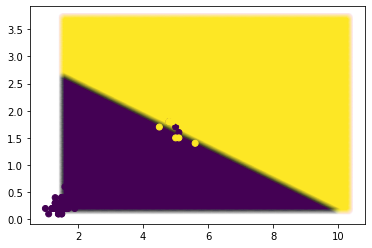

In [85]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),  ## cost function의 gradient 시 stochastic 방식을 사용 instead of closed form 
))                                                 ## 수렴은 조금 느리지만 데이터셋이 매우 큰 경우 효과적 



svm_clf.fit(x,y)
draw_2d_map(svm_clf, x, y, 0.01)





## Nonlinear SVM Classification


### 1. Polynomial Features

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


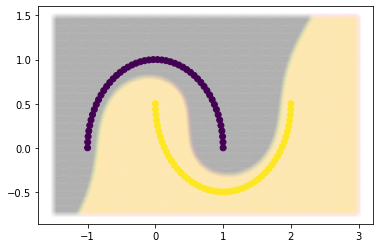

In [87]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

x, y = make_moons()

poly_svm_clf = Pipeline((
    ("poly", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))  # hinge option make gradient descent is performed with stochastic, instead of batch
))

poly_svm_clf.fit(x,y)
draw_2d_map(poly_svm_clf, x, y, 0.01)


## 2. Polynomial Kernel
 - Polynomial Feature 적용이 간편하고 다양한 Nonlinear Classification에 적용가능하지만 
 - Feature의 수가 증가함에 따라 연산량이 비약적으로 증가함 
 - SVM의 경우 Kernel Trick이라는 방법을 이용하면 이러한 Trade off 없이 동일한 효과를 얻을 수 있음

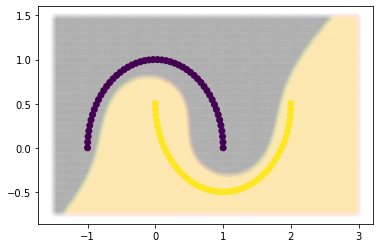

In [88]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=0.5, C=5))
))

poly_kernel_svm_clf.fit(x,y)
draw_2d_map(poly_kernel_svm_clf, x, y, 0.01)


## 3. Similarity Features
 - 특정 Landmark로 부터 dataset의 각 인스턴스와의 유사도를 측정하여 데이터를 linearly separable한 데이터로 변환 
 - how select landmark?
   - dataset의 모든 인스턴스에 대해 landmark를 생성하고 변환 
   - m(instance) x n(feature) dataset -> m x m dataset
   - 만약 training set이 매우 클 경우 그만큼의 feature가 생성되게됨 
### **computationally expensive!**
 - Gaussian RBF Kernel 
   - SVM Kernel Trick을 이용하여 이러한 trade-off를 제거하고 유사한 효과를 낼 수 있음
   - hyperparameter
     - gamma : 증가시키면 trainig model에 대한 fit이 증가  / 감소 시키면 fit이 감소 => 기능적으로 C hyperparameter와 유사 
     
         


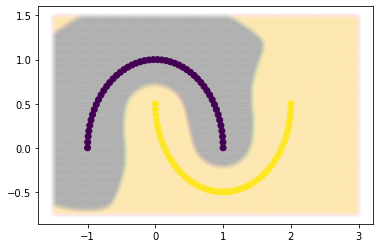

In [95]:
rbf_k_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
))
rbf_k_svm_clf.fit(x,y)

draw_2d_map(rbf_k_svm_clf, x, y, 0.01)



## Which kernel to choose for SVM model (rule of thumbs)
 - Linear (LinearSVC)  (1st) 
 - RBF                 (2nd)
 - others               ..